In [20]:
# Package imports for data science and time series analysis in particular
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd;
import scipy.stats as stats;
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from statsmodels.tsa.api import Holt
import matplotlib.dates as mdates

# Lab time series analysis: golden cross

A *Golden Cross* is the name of a pattern that is used in the technical analysis of stock prices. A Golden Cross occurs when a short-term moving average breaks above a long-term moving average. This is an indicator for the potential of a major rally on the stock (*bull market*). The long-term moving average is then considered to be a "resistance level", i.e. when the stock price drops towards that level, it will often quickly bounce up again.

The dataset `SP500.csv` contains among others the closing price of the Standard & Poors 500, a stock market index tracking the performance of 500 large publicly traded companies in the USA. The data was collected by Hoseinzade & Haratizadeh (2019).

- Import the CSV-file in a DataFrame, parse the `Date` column as a date and set it as the index. We will only use the variable `Close`, so you can drop all other variables.
- Plot the time series to get an idea about the evolution over time of the S&P500 index.

In [27]:
SP500 = pd.read_csv("../data/SP500.csv", index_col='Date')
SP500.head()

,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,ROC_20,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,1115.099976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39
2010-01-04,1132.989990,0.921723,0.016043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10
2010-01-05,1136.520020,-0.375903,0.003116,0.016043,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,-0.90,1.42,-0.12
2010-01-06,1137.140015,0.996234,0.000546,0.003116,0.016043,NaN,NaN,NaN,NaN,NaN,...,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.62,2.25,1.77
2010-01-07,1141.689941,0.059932,0.004001,0.000546,0.003116,0.016043,NaN,NaN,NaN,NaN,...,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,-1.85,0.22,-0.58


Traders often use moving averages when analysing the evolution of stock prices. Specifically, the 50-day moving average is the average price over the last 10 trading weeks, making it a commonly used support level. Likewise, the 200-day moving average represents the average price over the past 40 weeks, which is used to suggest a relatively cheap price compared to the price range over most of the past year.

- Calculate the 50- and 200-day moving average and add the result as new columns in the DataFrame with names `MA50` and `MA200`, respectively.

In [28]:
MA50 = SP500['Close'].rolling(50).mean()

MA200 = SP500['Close'].rolling(200).mean()

print(MA200)
print('*'*50)
print(MA50)
print('*'*50)
print(SP500)



Date
2009-12-31            NaN
2010-01-04            NaN
2010-01-05            NaN
2010-01-06            NaN
2010-01-07            NaN
                 ...     
2017-11-09    2432.128003
2017-11-10    2433.566053
2017-11-13    2435.085754
2017-11-14    2436.585754
2017-11-15    2438.011105
Name: Close, Length: 1984, dtype: float64
**************************************************
Date
2009-12-31            NaN
2010-01-04            NaN
2010-01-05            NaN
2010-01-06            NaN
2010-01-07            NaN
                 ...     
2017-11-09    2533.804614
2017-11-10    2536.017617
2017-11-13    2538.183418
2017-11-14    2540.603818
2017-11-15    2542.585420
Name: Close, Length: 1984, dtype: float64
**************************************************
                  Close    Volume       mom      mom1      mom2      mom3  \
Date                                                                        
2009-12-31  1115.099976       NaN       NaN       NaN       NaN       NaN   
2

- Plot the S&P500 index with both moving averages


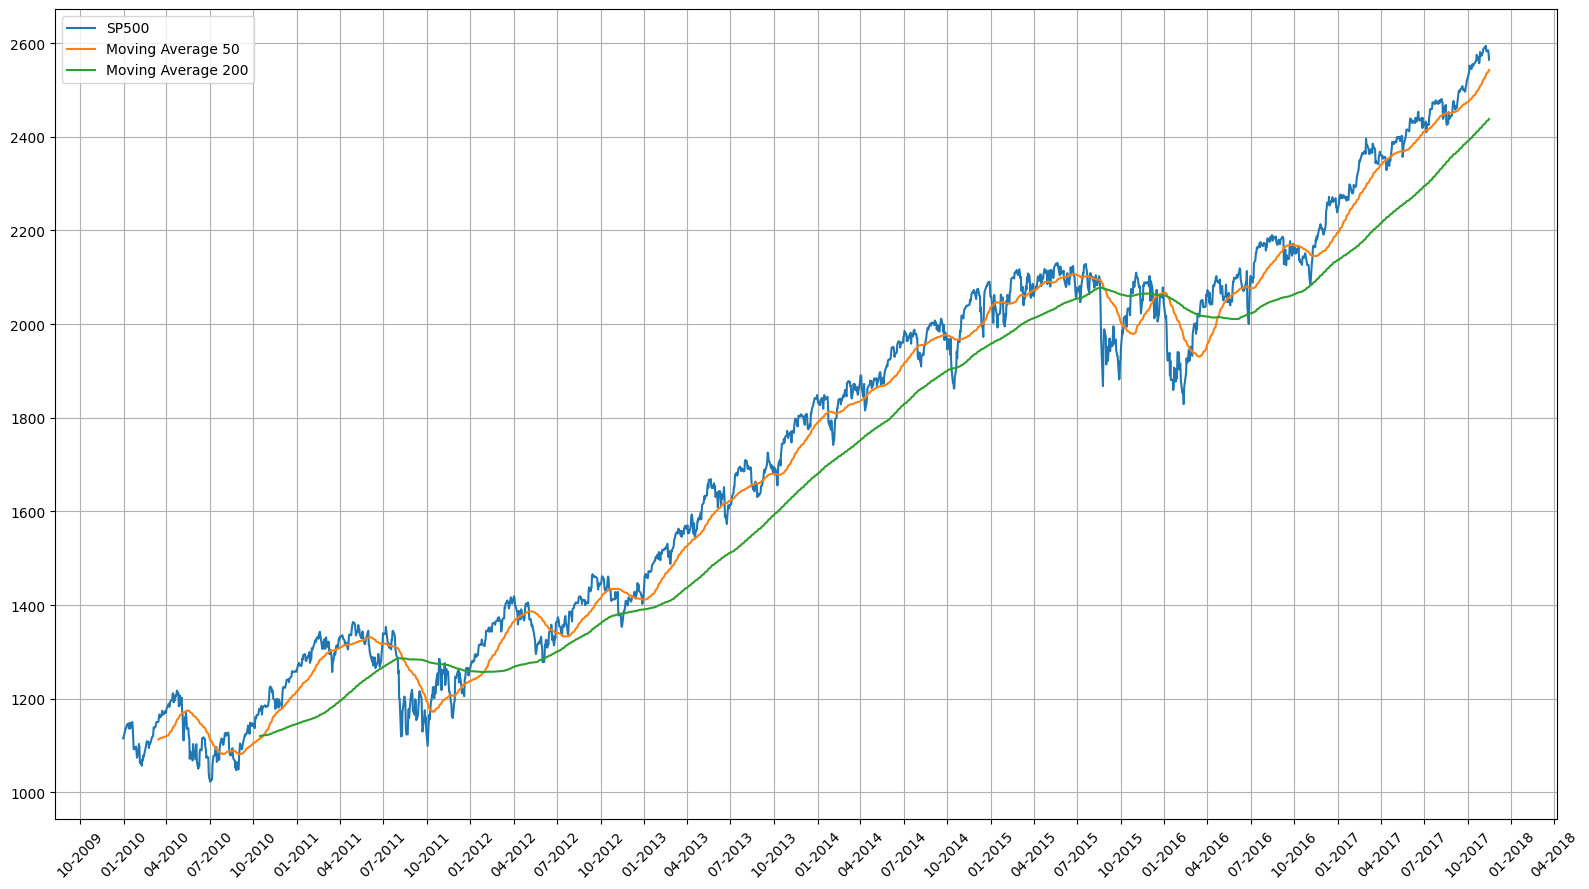

In [37]:
# Convert the index of your data to datetime if it's not already
SP500.index = pd.to_datetime(SP500.index)
MA50.index = pd.to_datetime(MA50.index)
MA200.index = pd.to_datetime(MA200.index)

# Define the figure size
plt.figure(figsize=(16, 9))

# Plot the data
plt.plot(SP500.index, SP500['Close'], label='SP500')
plt.plot(MA50.index, MA50, label='Moving Average 50')
plt.plot(MA200.index, MA200, label='Moving Average 200')

# Set the tick frequency to yearly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator((1,4,7, 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))  # Format as year

# Rotate tick labels (e.g., by 45 degrees) for better readability
plt.xticks(rotation=45)

# Add grid lines
plt.grid(True)

# Add legend and show the plot
plt.legend()
plt.tight_layout()  # Ensures labels fit properly
plt.show()



- In August 2011, stock markets across the world [saw a sharp drop in stock prices](https://en.wikipedia.org/wiki/August_2011_stock_markets_fall), due to the [European sovereign debt crisis](https://en.wikipedia.org/wiki/European_debt_crisis). Look for that drop in the plot.
- After the 2011 stock markets fall, there are *two* occurrences of a golden cross.
- Both occurrences mark the beginning of long periods with a *bull market* (characterized by rising prices). If possible, identify how long each period lasted, i.e. when does the `MA50` drops below `MA200` again?
- Can you identify occurrences when the `MA200` effectively behaves like a support level?

## References

Hoseinzade, E., & Haratizadeh, S. (2019-09). *CNNpred: CNN-based stock market prediction using a diverse set of variables.* Expert Systems with Applications, **129,** pp. 273–285. https://doi.org/10.1016/j.eswa.2019.03.029

In [40]:
# Find the periods when MA50 goes above MA200
above_periods = []
current_period_start = None

for date in MA50.index:
    if MA50.at[date] > MA200.at[date]:
        if current_period_start is None:
            current_period_start = date
    elif current_period_start is not None:
        above_periods.append((current_period_start, date))
        current_period_start = None

# Check if a period is still ongoing
if current_period_start is not None:
    above_periods.append((current_period_start, MA50.index[-1]))

# Calculate the duration of each above period
above_durations = [(end - start).days for start, end in above_periods]

print("Periods when MA50 goes above MA200:")
for period, duration in zip(above_periods, above_durations):
    print(f"Start: {period[0]}, End: {period[1]}, Duration: {duration} days")

Periods when MA50 goes above MA200:
Start: 2010-10-22 00:00:00, End: 2011-08-12 00:00:00, Duration: 294 days
Start: 2012-01-31 00:00:00, End: 2015-08-28 00:00:00, Duration: 1305 days
Start: 2015-12-21 00:00:00, End: 2016-01-11 00:00:00, Duration: 21 days
Start: 2016-04-25 00:00:00, End: 2017-11-15 00:00:00, Duration: 569 days
